<a href="https://colab.research.google.com/github/Jefferson-marques/PJ2/blob/master/Analise_dados_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados da NBA de 2004-2020

A National Basketball Association (em português: Associação Nacional de Basquetebol; abreviação oficial: NBA) é a principal liga de basquetebol profissional da América do Norte. Com 30 franquias sendo membros da mesma (29 nos Estados Unidos e 1 no Canadá), a NBA também é considerada a principal liga de basquete do mundo. É um membro ativo da USA Basketball (USAB), que é reconhecida pela FIBA (a Federação Internacional de Basquetebol) como a entidade máxima e organizadora do basquetebol nos Estados Unidos. A NBA é uma das 4 'major leagues' de esporte profissional na América do Norte. Os jogadores da NBA são os mais bem pagos esportistas do mundo, por salário médio anual.

# Importação de Bibliotecas

In [0]:
# importando bibliotecas
import pandas as pd
import numpy as np
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

# Obtenção de Dados

Os dados foram obtidos e se encontra [nesse link](https://github.com/Jefferson-marques/Analise_Dados_NBA) onde há os arquivos CSV de todos os jogos, times, detalhes dos jogos, jogadores e a posição nas conferencias de cada time até o dia **2020-02-03**

In [0]:
# obtendo os dados
games_details = pd.read_csv('games_details.csv')
games = pd.read_csv('games.csv')
players = pd.read_csv('players.csv')
ranking = pd.read_csv('ranking.csv')
teams = pd.read_csv('teams.csv')

# Resumo dos dados

In [0]:
# resumo dos dados
games_details.head(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900741,1610612753,ORL,Orlando,1628411,Wes Iwundu,F,NaN,22:14,3.0,8.0,0.375,1.0,4.0,0.25,2.0,2.0,1.000,0.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,9.0,2.0
1,21900741,1610612753,ORL,Orlando,203932,Aaron Gordon,F,NaN,37:39,6.0,12.0,0.500,2.0,5.0,0.40,2.0,6.0,0.333,2.0,10.0,12.0,5.0,2.0,0.0,1.0,2.0,16.0,13.0
2,21900741,1610612753,ORL,Orlando,202696,Nikola Vucevic,C,NaN,36:27,10.0,19.0,0.526,1.0,5.0,0.20,1.0,2.0,0.500,3.0,4.0,7.0,5.0,0.0,0.0,1.0,1.0,22.0,11.0
3,21900741,1610612753,ORL,Orlando,203095,Evan Fournier,G,NaN,30:49,7.0,14.0,0.500,3.0,6.0,0.50,0.0,0.0,0.000,0.0,3.0,3.0,1.0,0.0,0.0,3.0,1.0,17.0,23.0
4,21900741,1610612753,ORL,Orlando,1628365,Markelle Fultz,G,NaN,34:42,4.0,6.0,0.667,1.0,2.0,0.50,3.0,4.0,0.750,0.0,1.0,1.0,14.0,2.0,0.0,2.0,3.0,12.0,9.0


In [0]:
# resumo dos dados
games.head(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-02-03,21900741,Final,1610612766,1610612753,2019,1610612766,100.0,0.461,0.643,0.290,24.0,46.0,1610612753,112.0,0.538,0.588,0.471,35.0,37.0,0
1,2020-02-03,21900742,Final,1610612739,1610612752,2019,1610612739,134.0,0.565,0.667,0.514,34.0,34.0,1610612752,139.0,0.559,0.714,0.385,33.0,46.0,0
2,2020-02-03,21900743,Final,1610612754,1610612742,2019,1610612754,103.0,0.458,0.727,0.206,28.0,40.0,1610612742,112.0,0.419,0.957,0.400,20.0,51.0,0
3,2020-02-03,21900744,Final,1610612764,1610612744,2019,1610612764,117.0,0.506,0.828,0.409,28.0,35.0,1610612744,125.0,0.494,0.774,0.500,31.0,44.0,0
4,2020-02-03,21900745,Final,1610612737,1610612738,2019,1610612737,115.0,0.500,0.905,0.400,22.0,32.0,1610612738,123.0,0.533,0.882,0.414,21.0,44.0,0


In [139]:
# resumo dos dados
ranking.head(5)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612747,0,22019,2020-02-03,West,L.A. Lakers,48,37,11,0.771,16-6,21-5
1,1610612746,0,22019,2020-02-03,West,LA Clippers,50,35,15,0.700,21-5,14-10
2,1610612743,0,22019,2020-02-03,West,Denver,50,34,16,0.680,19-6,15-10
3,1610612762,0,22019,2020-02-03,West,Utah,49,32,17,0.653,18-4,14-13
4,1610612745,0,22019,2020-02-03,West,Houston,49,31,18,0.633,17-7,14-11


In [0]:
# resumo dos dados
players.head(5)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [0]:
# resumo dos dados
teams.head(5)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


# Analise dos dados

### Quem são os jogadores que tem mais partidas jogadas ?

In [0]:
# criando gráfico
def plot_top(df, column, label_col=None, max_plot=5):
    top_df = df.sort_values(column, ascending=False).head(max_plot)
    
    height = top_df[column]
    x = top_df.index if label_col == None else top_df[label_col]
    
    gold, silver, bronze, other = ('#FFA400', '#bdc3c7', '#cd7f32', '#3498db')
    colors = [gold if i == 0 else silver if i == 1 else bronze if i == 2 else other for i in range(0, len(top_df))]
    
    fig, ax = plt.subplots(figsize=(18, 7))
    ax.bar(x, height, color=colors)
    plt.xticks(x, x, rotation=60)
    plt.xlabel(label_col)
    plt.ylabel(column)
    plt.title(f'Top {max_plot} de {column}')
    plt.show()



In [0]:
# Criando gráfico
players_name = games_details['PLAYER_NAME']
val_cnt = players_name.value_counts().to_frame().reset_index()
val_cnt.columns = ['Nome jogador', 'Número de jogos']

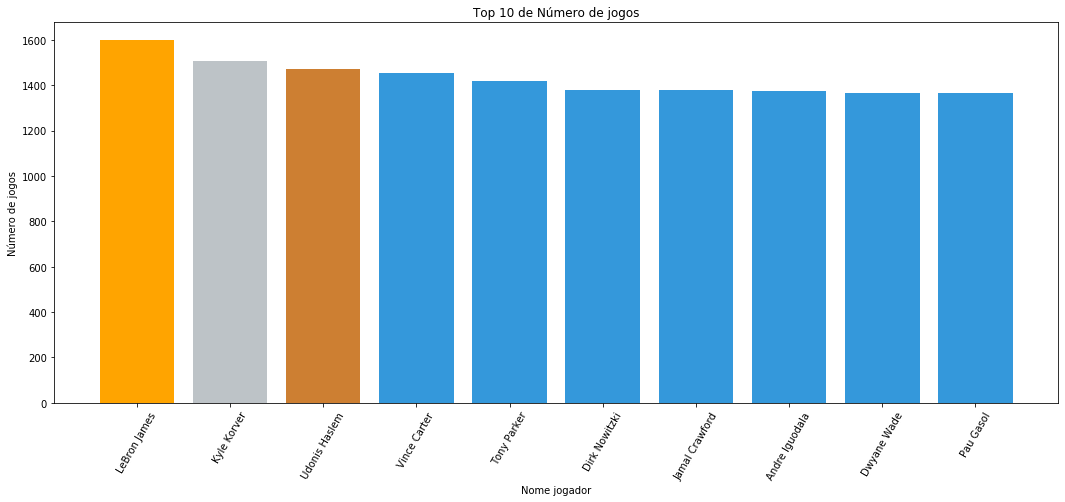

In [119]:
plot_top(val_cnt, column='Número de jogos', label_col='Nome jogador', max_plot=10)

### Maior número de jogos é igual a maior tempo jogado ?

In [0]:
# criando gráfico
def convert_min(x) :
  if pd.isna(x) :
    return 0
  x = str(x).split(':')
  if len(x) < 2:
    return int(x[0])
  else:
    return int(x[0])*60+int(x[1])

In [121]:
df_tmp = games_details[['PLAYER_NAME', 'MIN']]
df_tmp.loc[:,'MIN'] = df_tmp['MIN'].apply(convert_min)
agg = df_tmp.groupby('PLAYER_NAME').agg('sum').reset_index()
agg.columns = ['Nome jogador', 'Número de segundos jogados']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


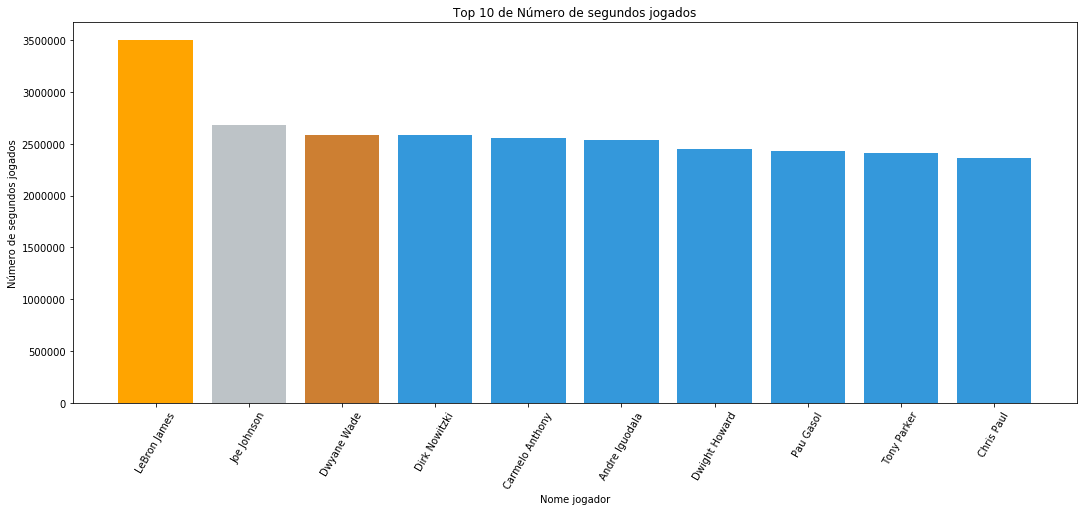

In [122]:
plot_top(agg, column='Número de segundos jogados', label_col='Nome jogador', max_plot=10)

### Quais são as estatísticas médias de Lebron James comparadas às estatísticas gerais?

In [0]:
stats_cols = {
    'FGM':'Field Goals Made',
    'FGA':'Field Goals Attempted',
    'FG_PCT':'Field Goal Percentage',
    'FG3M':'Three Pointers Made',
    'FG3A':'Three Pointers Attempted',
    'FG3_PCT':'Three Point Percentage',
    'FTM':'Free Throws Made',
    'FTA':'Free Throws Attempted',
    'FT_PCT':'Free Throw Percentage',
    'OREB':'Offensive Rebounds',
    'DREB':'Defensive Rebounds',
    'REB':'Rebounds',
    'AST':'Assists',
    'TO':'Turnovers',
    'STL':'Steals',
    'BLK':'Blocked Shots',
    'PF':'Personal Foul',
    'PTS':'Points',
    'PLUS_MINUS':'Plus-Minus'
}

In [0]:
def agg_on_columns(df, agg_var, operation=['mean']):
    return df[agg_var].agg(operation)

# remover jogadores que não jogaram um jogo
df_tmp = games_details[~games_details['MIN'].isna()]
del df_tmp['MIN']

# Define as principais colunas de estatísticas, uma para variável percentual e outra para outras estatísticas importantes
prct_var = ['FG_PCT', 'FG3_PCT', 'FT_PCT']
other_var = ['REB', 'AST', 'STL', 'PF', 'BLK'] 

# criar um dataset especifico para o Lebron James
lebron_james_df = df_tmp[df_tmp['PLAYER_NAME'] == 'LeBron James']

overall_agg_prct = agg_on_columns(df=df_tmp, agg_var=prct_var, operation=['mean'])
overall_agg_other = agg_on_columns(df=df_tmp, agg_var=other_var, operation=['mean'])

lebron_james_stats_prct = agg_on_columns(df=lebron_james_df, agg_var=prct_var, operation=['mean'])
lebron_james_stats_other = agg_on_columns(df=lebron_james_df, agg_var=other_var, operation=['mean'])

In [0]:
stats_prct = pd.concat([lebron_james_stats_prct, overall_agg_prct]) 
stats_other = pd.concat([lebron_james_stats_other, overall_agg_other]) 

stats_prct.index = ['Lebron James', 'overall stats']
stats_other.index = ['Lebron James', 'overall stats']

In [0]:
def radar_plot(ax, df, max_val=1):
    # número de variaveis
    categories=list(df)
    N = len(categories)

    # Qual será o ângulo de cada eixo no gráfico? (dividimos o gráfico / número de variáveis)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    
    plt.xticks(angles[:-1], categories, color='black', size=12)

    
    ax.set_rlabel_position(0)
    yticks = [max_val*i/4 for i in range(1,4)]
    plt.yticks(yticks, [str(e) for e in yticks], color="grey", size=10)
    plt.ylim(0,max_val)

    
    colors = ['b','r','g']
    for i in range(len(df)):
        values = df.values[i].flatten().tolist()
        values += values[:1]
        color = colors[i]

        
        ax.plot(angles, values, linewidth=1, linestyle='solid', color=color, label=df.index[i])

        
        ax.fill(angles, values, color, alpha=0.1)
     
    
    plt.legend(loc=0, bbox_to_anchor=(0.1, 0.1), prop={'size': 13})

In [0]:
def rename_df(df, col_dict):
    cols = df.columns
    new_cols = [(col_dict[c] if c in col_dict else c) for c in cols]
    df.columns = new_cols
    return df

stats_prct = rename_df(stats_prct, col_dict=stats_cols)
stats_other = rename_df(stats_other, col_dict=stats_cols)

#### Stats comparison between Lebron James and overall statistics

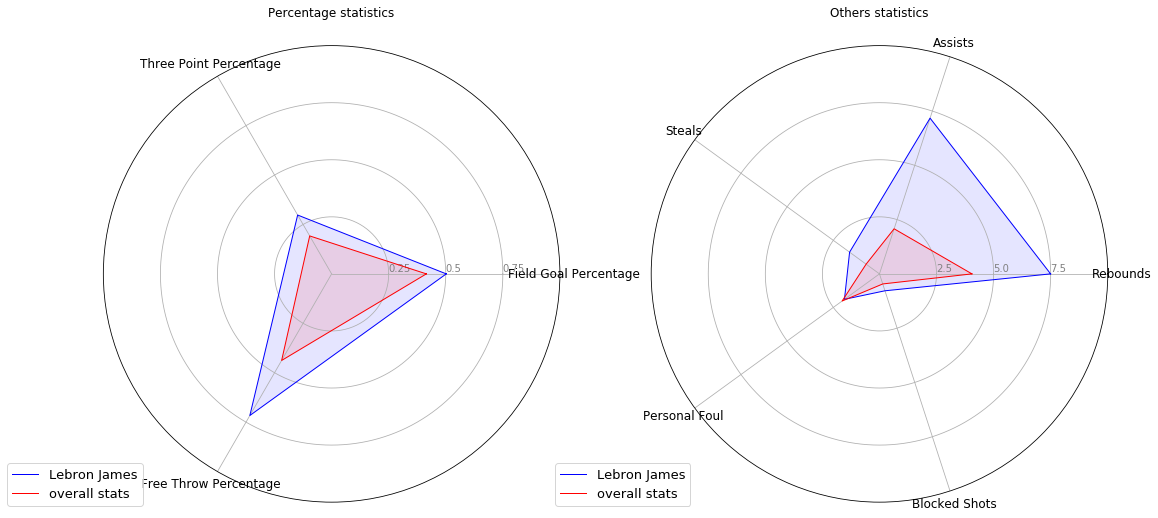

In [131]:
display(Markdown('#### Stats comparison between Lebron James and overall statistics'))
fig, ax = plt.subplots(figsize=(18, 9))

ax = plt.subplot(121, polar=True)
ax.set_title('Percentage statistics')
radar_plot(ax=ax, df=stats_prct, max_val=1)

ax = plt.subplot(122, polar=True)
ax.set_title('Others statistics')
radar_plot(ax=ax, df=stats_other, max_val=10)

plt.show() ;

### Comparar estatística de outros jogadores ( LeBron James x Kobe Bryant)

In [0]:
def get_players_stats(player_one, player_two):
    # remover jogadores que não jogaram um jogo
    df_tmp = games_details[~games_details['MIN'].isna()]
    del df_tmp['MIN']

    # Define as principais colunas de estatísticas, uma para variável percentual e outra para outras estatísticas importantes
    prct_var = ['FG_PCT', 'FG3_PCT', 'FT_PCT']
    other_var = ['REB', 'AST', 'STL', 'BLK','PLUS_MINUS'] 

    # criar um dataset especifico para os dois jogadores
    player_one_df = df_tmp[df_tmp['PLAYER_NAME'] == player_one]
    player_two_df = df_tmp[df_tmp['PLAYER_NAME'] == player_two]

    player_one_agg_prct = agg_on_columns(df=player_one_df, agg_var=prct_var, operation=['mean'])
    player_one_agg_other = agg_on_columns(df=player_one_df, agg_var=other_var, operation=['mean'])

    player_two_agg_prct = agg_on_columns(df=player_two_df, agg_var=prct_var, operation=['mean'])
    player_two_agg_other = agg_on_columns(df=player_two_df, agg_var=other_var, operation=['mean'])
    
    stats_prct = pd.concat([player_one_agg_prct, player_two_agg_prct]) 
    stats_other = pd.concat([player_one_agg_other, player_two_agg_other]) 

    stats_prct.index = [player_one, player_two]
    stats_other.index = [player_one, player_two]
    
    stats_prct = rename_df(stats_prct, col_dict=stats_cols)
    stats_other = rename_df(stats_other, col_dict=stats_cols)
    
    return stats_prct, stats_other

def show_player_stats_comparison(stats_prct, stats_other):
    fig, ax = plt.subplots(figsize=(18,15))

    ax = plt.subplot(121, polar=True)
    ax.set_title('Estatísticas em Porcentagem')
    radar_plot(ax=ax, df=stats_prct, max_val=1)

    ax = plt.subplot(122, polar=True)
    ax.set_title('Outras Estatísticas ')
    radar_plot(ax=ax, df=stats_other, max_val=10)

    plt.show()

In [0]:
player_one = 'LeBron James'
player_two = 'Kobe Bryant'
stats_prct, stats_other = get_players_stats(player_one=player_one, player_two=player_two)

#### Stats comparison between LeBron James and Kobe Bryant

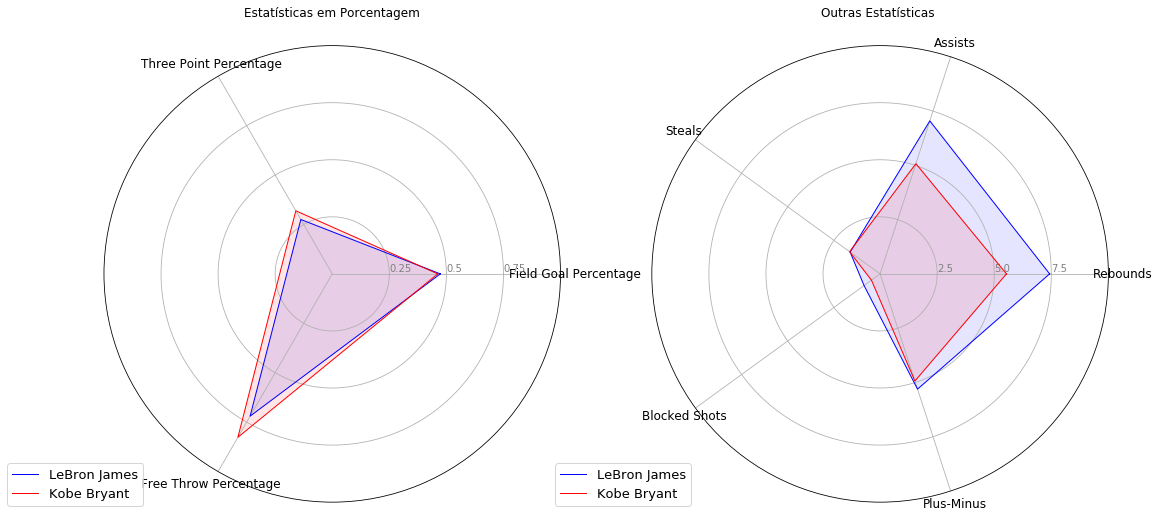

In [85]:
display(Markdown(f'#### Stats comparison between {player_one} and {player_two}'))
show_player_stats_comparison(stats_prct, stats_other)

### Qual time tem a maior quantidade de vitórias desde a temporada de 2004-2005 ?

In [0]:
winning_teams = np.where(games['HOME_TEAM_WINS'] == 1, games['HOME_TEAM_ID'], games['VISITOR_TEAM_ID'])
winning_teams = pd.DataFrame(winning_teams, columns=['TEAM_ID'])
winning_teams = winning_teams.merge(teams[['TEAM_ID', 'NICKNAME']], on='TEAM_ID')['NICKNAME'].value_counts().to_frame().reset_index()
winning_teams.columns = ['Nome do Time', 'Número de vitórias']

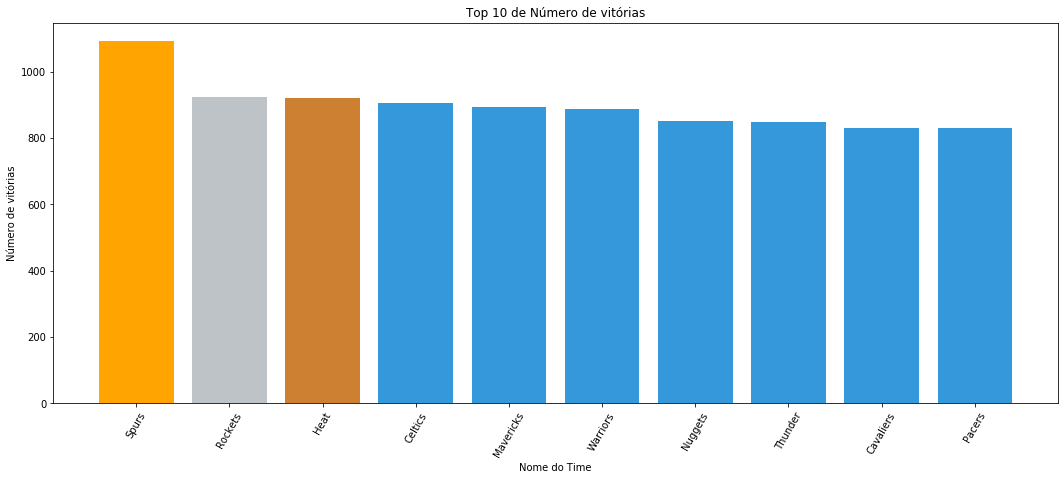

In [135]:
plot_top(winning_teams, column='Número de vitórias', label_col='Nome do Time', max_plot=10)